In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SA = pd.read_csv('Files/CR-shortanswer.csv')

In [3]:
def missing_fill_3(question):

    if "Strongly agree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly agree"])
        question = question.add(fill, fill_value=0)
    
    if "Agree" not in question.keys():
        fill = pd.Series([0], index = ["Agree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat agree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat agree"])
        question = question.add(fill, fill_value=0)
    
    if "Neither agree nor disagree" not in question.keys():
        fill = pd.Series([0], index = ["Neither agree nor disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat disagree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Disagree" not in question.keys():
        fill = pd.Series([0], index = ["Disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Strongly disagree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly disagree"])
        question = question.add(fill, fill_value=0)

    else:
        question = question

    return question

In [4]:
def draw3(value, Width, xlabel, scale):
    fig = plt.figure(figsize=[15, 15])
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(7)
    
    for i in scale:
        q = value["Q3_" + str(i)][18:34].value_counts()

        ax.bar(br, missing_fill_3(q), width = 0.1, label = value["Q3_" + str(i)][0].split("-")[1])
        ax.margins(x=0.1)
        br = [x + barWidth for x in br]
        ax.legend()
        #ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
    
    plt.xticks([r + barWidth for r in range(7)],
        xlabel)

In [5]:
a = ['Strongly agree','Agree', 'Somewhat agree', 'Neither agree nor disagree',
       'Somewhat disagree', 'Disagree', 'Strongly disagree']

Software General Usability      

Text(0.5, 1.0, 'Software General Usability')

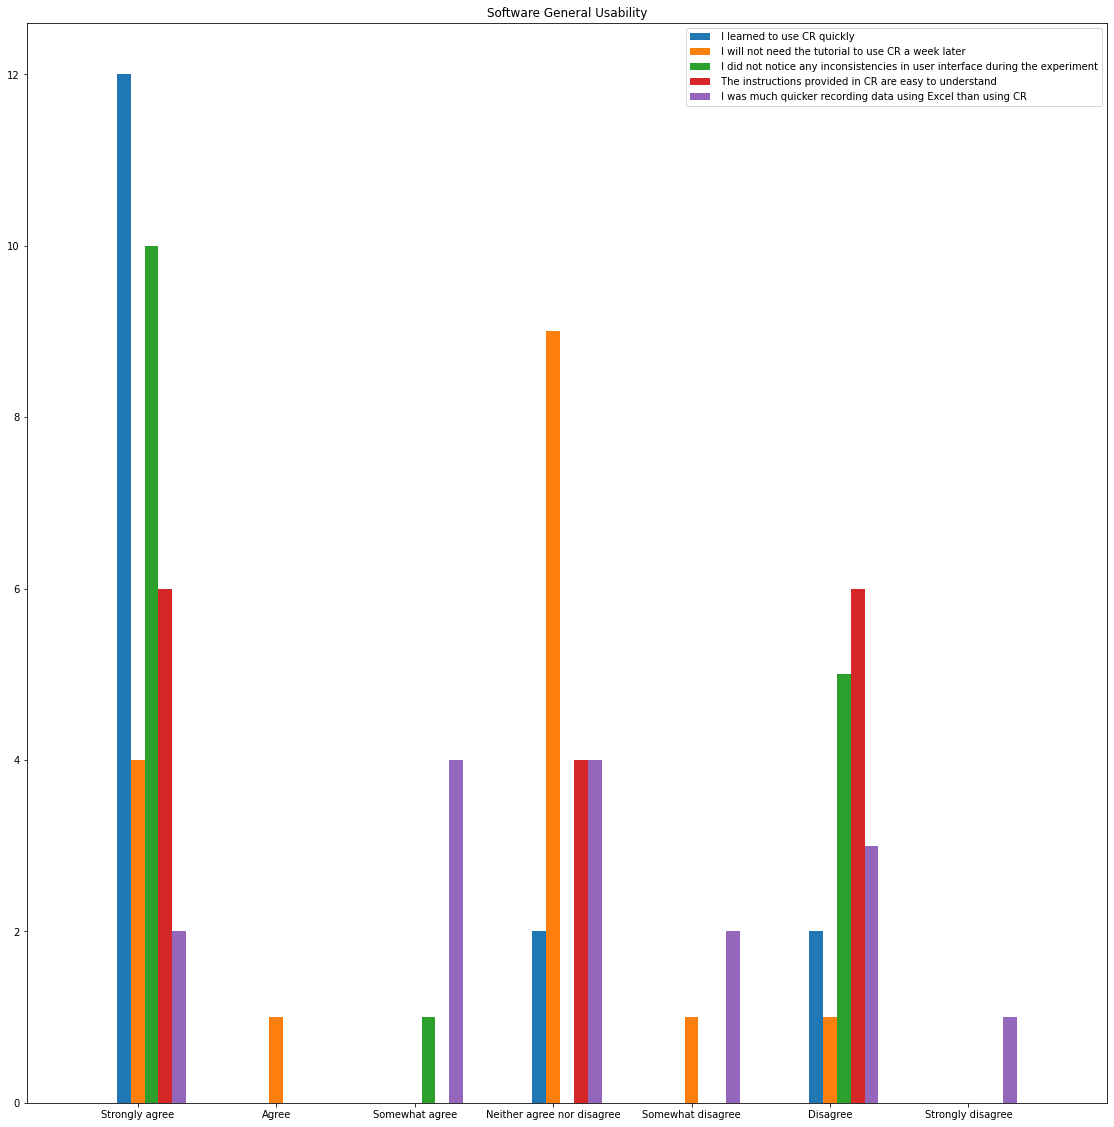

In [6]:
scale = [1, 2, 3, 4, 7]
draw3(SA, 0.1, a, scale)

plt.savefig(os.path.join('Pics/Question Classifier/Software General Usability.png'), dpi=300, format='png', bbox_inches='tight')
plt.title("Software General Usability")

Vocabulary convergence features

Text(0.5, 1.0, 'Vocabulary convergence features')

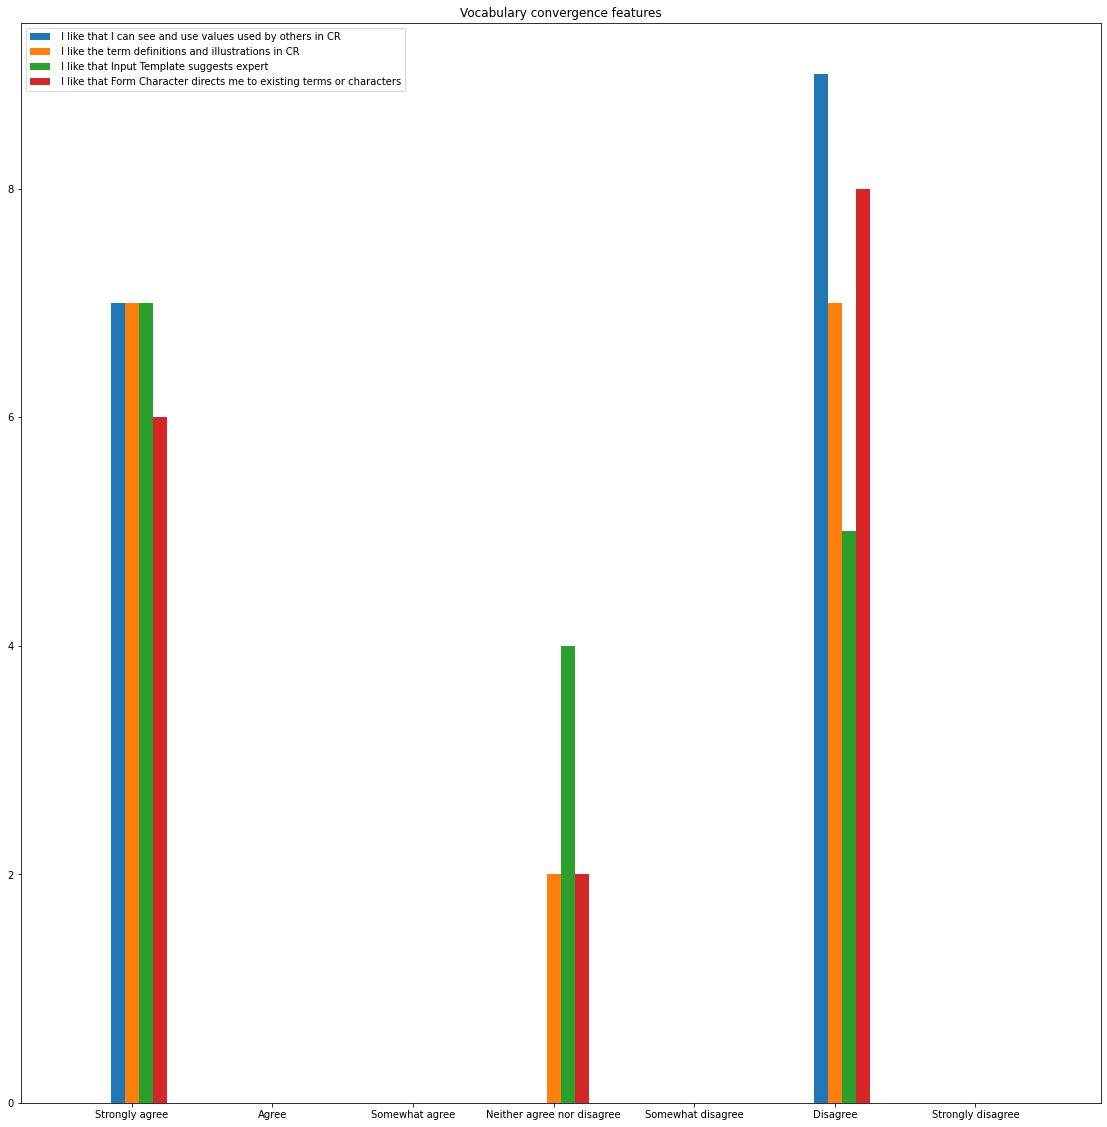

In [7]:
scale = [5, 6, 13, 14]
draw3(SA, 0.1, a, scale)

plt.savefig(os.path.join('Pics/Question Classifier/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')
plt.title("Vocabulary convergence features")

Psychological features

Text(0.5, 1.0, 'Psychological featuress')

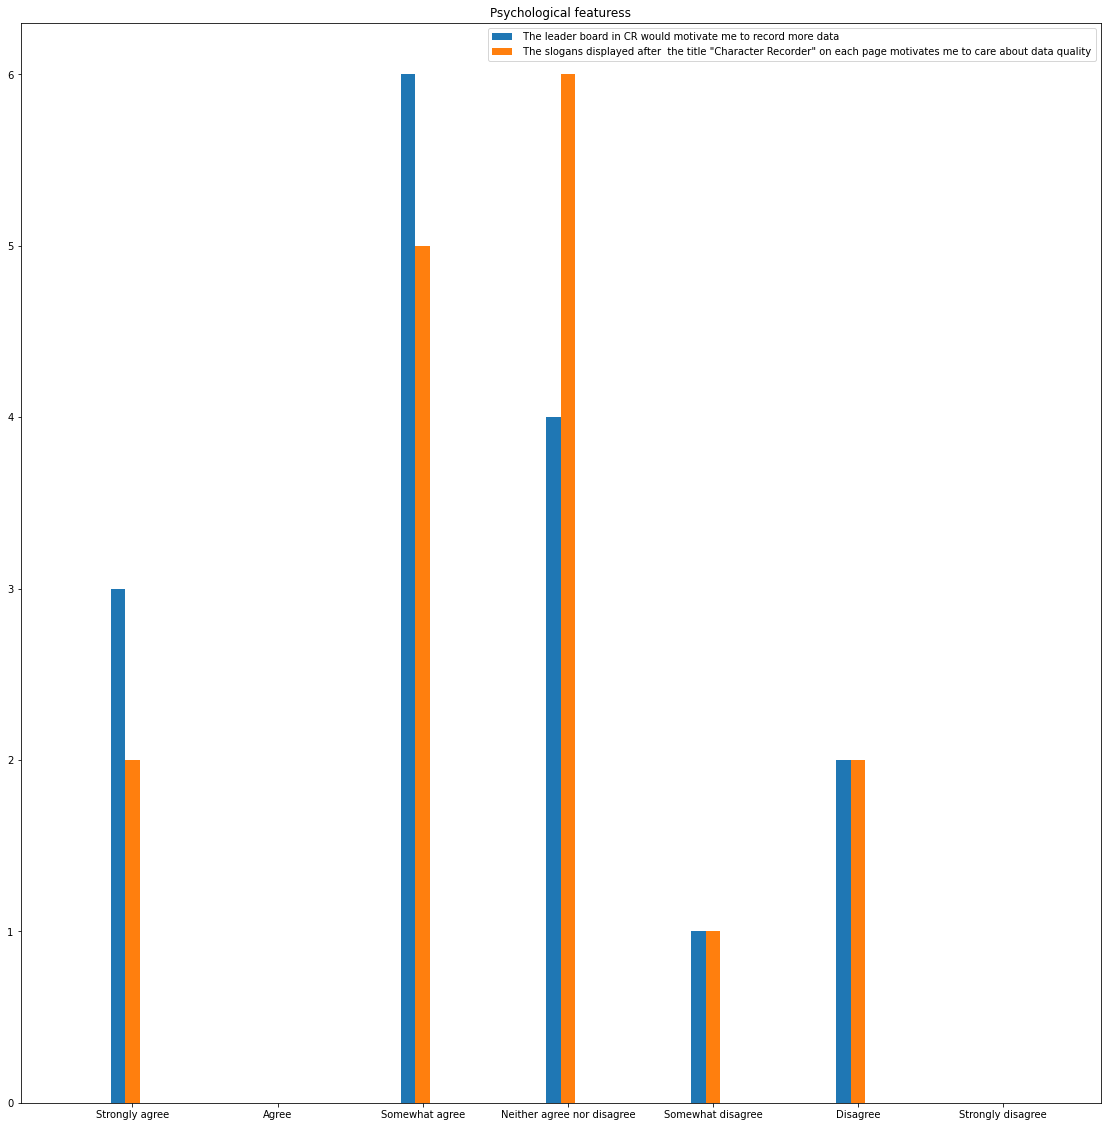

In [8]:
scale = [10, 11]
draw3(SA, 0.1, a, scale)

plt.savefig(os.path.join('Pics/Question Classifier/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')
plt.title("Psychological featuress")

Overall Preference

Text(0.5, 1.0, 'Overall Preference')

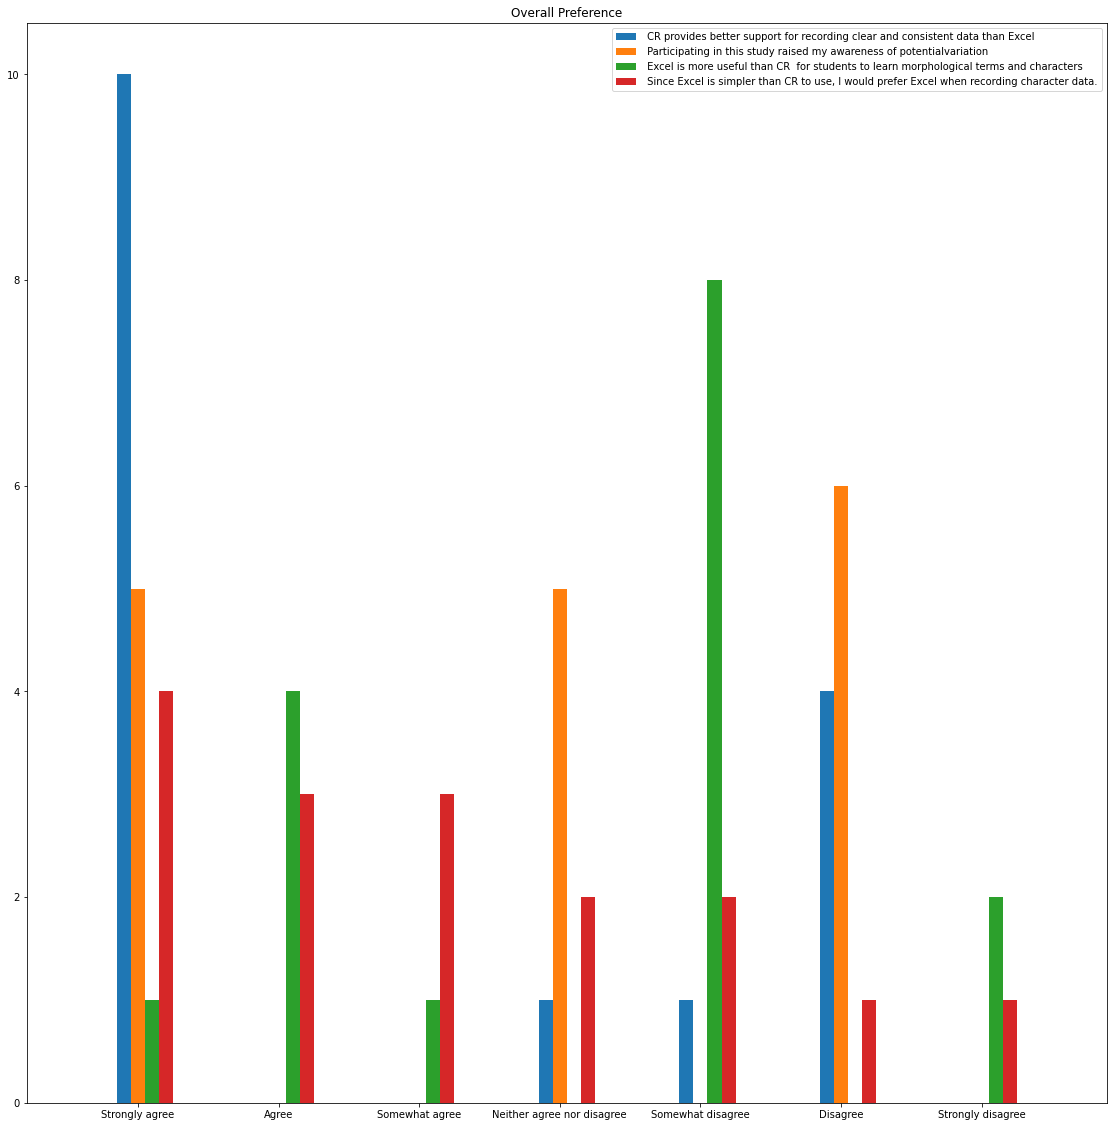

In [9]:
scale = [9, 16, 8, 15]
draw3(SA, 0.1, a, scale)

plt.savefig(os.path.join('Pics/Question Classifier/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')
plt.title("Overall Preference")